In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [4]:
df=pd.read_csv('file:///C:/Users/mdasi/Downloads/Compressed/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.shape

(20640, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [9]:
df['median_house_value'].unique()

array([452600., 358500., 352100., ..., 425800., 200700.,  47000.])

In [10]:
df['median_income'].unique()

array([8.3252, 8.3014, 7.2574, ..., 2.3598, 2.3661, 2.0943])

In [11]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [12]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [15]:
df['total_bedrooms'].value_counts()

280.0     262
331.0      51
345.0      50
393.0      49
343.0      49
         ... 
2205.0      1
1448.0      1
1691.0      1
2537.0      1
2546.0      1
Name: total_bedrooms, Length: 1923, dtype: int64

In [16]:
df['total_bedrooms']=df['total_bedrooms'].fillna(df['total_bedrooms'].mean())

In [17]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [19]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [20]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [22]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,535.284351,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,420.053240,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,292.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,431.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [23]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.068831,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066147,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318710,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.925723,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.068831,-0.066147,-0.318710,0.925723,1.000000,0.871989,0.972731,-0.007511,0.049406
population,0.099773,-0.108785,-0.296244,0.857126,0.871989,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.972731,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007511,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049406,-0.024650,0.065843,0.688075,1.000000


In [25]:
df.corr().describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,9.0,0.019387,0.485465,-0.924664,-0.045967,0.044568,0.068831,1.0
latitude,9.0,-0.046614,0.485449,-0.924664,-0.108785,-0.071035,-0.036100,1.0
housing_median_age,9.0,-0.043285,0.423069,-0.361262,-0.302916,-0.119034,0.011173,1.0
total_rooms,9.0,0.408971,0.514896,-0.361262,0.044568,0.198050,0.918484,1.0
total_bedrooms,9.0,0.388479,0.538339,-0.318710,-0.007511,0.068831,0.925723,1.0
population,9.0,0.367918,0.525593,-0.296244,-0.024650,0.099773,0.871989,1.0
households,9.0,0.395408,0.537368,-0.302916,0.013033,0.065843,0.918484,1.0
median_income,9.0,0.186940,0.390380,-0.119034,-0.015176,0.004834,0.198050,1.0
median_house_value,9.0,0.203147,0.381028,-0.144160,-0.024650,0.065843,0.134153,1.0


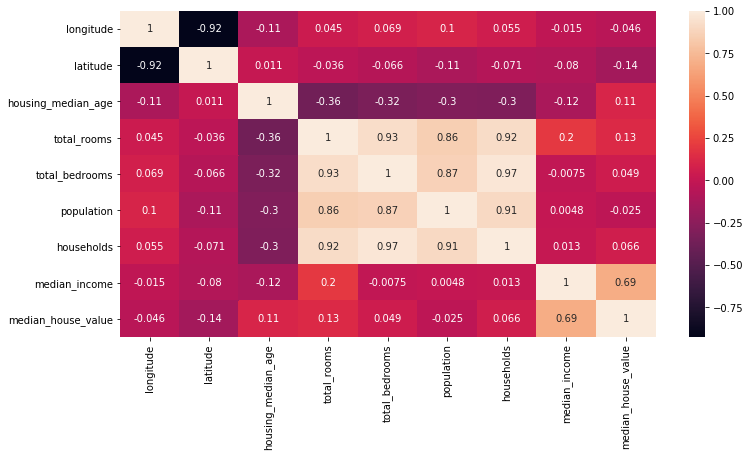

In [26]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

In [27]:
for i  in df.columns:
    print(f'unique values in column "{i}" is\n {df[i].value_counts()}')
    print('-------------------------------------------------')

unique values in column "longitude" is
 -118.31    162
-118.30    160
-118.29    148
-118.27    144
-118.32    142
          ... 
-115.72      1
-123.68      1
-116.09      1
-123.72      1
-116.69      1
Name: longitude, Length: 844, dtype: int64
-------------------------------------------------
unique values in column "latitude" is
 34.06    244
34.05    236
34.08    234
34.07    231
34.04    221
        ... 
41.63      1
41.88      1
35.89      1
33.27      1
41.61      1
Name: latitude, Length: 862, dtype: int64
-------------------------------------------------
unique values in column "housing_median_age" is
 52.0    1273
36.0     862
35.0     824
16.0     771
17.0     698
34.0     689
26.0     619
33.0     615
18.0     570
25.0     566
32.0     565
37.0     537
15.0     512
19.0     502
27.0     488
24.0     478
30.0     476
28.0     471
20.0     465
29.0     461
31.0     458
23.0     448
21.0     446
14.0     412
22.0     399
38.0     394
39.0     369
42.0     368
44.0     356
43

In [28]:
object_col=[]
num_col=[]
for i in df.columns:
    if df[i].dtype=='object':
        object_col.append(i)
    else:
        num_col.append(i)

In [29]:
object_col

['ocean_proximity']

In [30]:
num_col

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [31]:
df.min()

longitude               -124.35
latitude                  32.54
housing_median_age            1
total_rooms                   2
total_bedrooms                1
population                    3
households                    1
median_income            0.4999
median_house_value        14999
ocean_proximity       <1H OCEAN
dtype: object

In [32]:
df.max()

longitude                -114.31
latitude                   41.95
housing_median_age            52
total_rooms                39320
total_bedrooms              6445
population                 35682
households                  6082
median_income            15.0001
median_house_value        500001
ocean_proximity       NEAR OCEAN
dtype: object

In [33]:
df.skew()

longitude            -0.297801
latitude              0.465953
housing_median_age    0.060331
total_rooms           4.147343
total_bedrooms        3.473677
population            4.935858
households            3.410438
median_income         1.646657
median_house_value    0.977763
dtype: float64

In [34]:
df.mean()

longitude               -119.569704
latitude                  35.631861
housing_median_age        28.639486
total_rooms             2635.763081
total_bedrooms           535.284351
population              1425.476744
households               499.539680
median_income              3.870671
median_house_value    206855.816909
dtype: float64

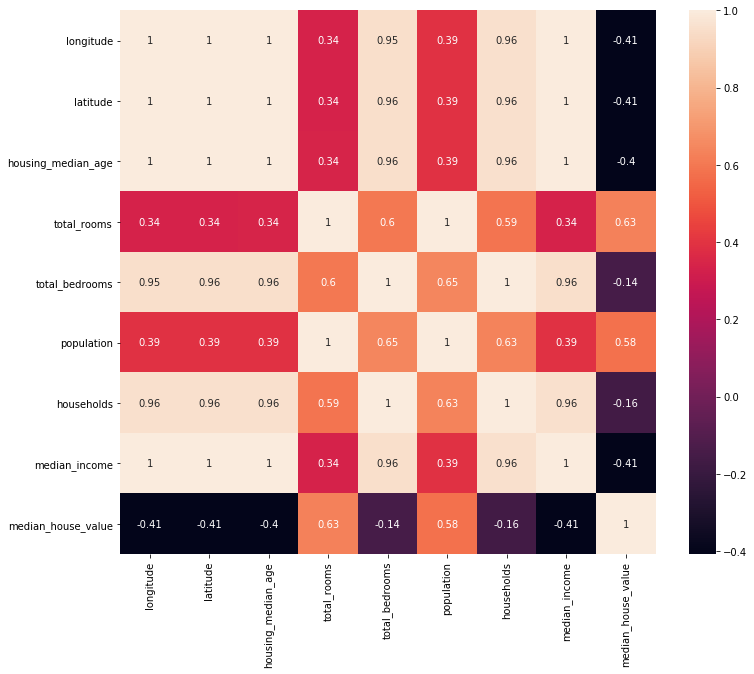

In [35]:
plt.figure(figsize=(12,10))
sns.heatmap(df.describe().corr(),annot=True)

In [36]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

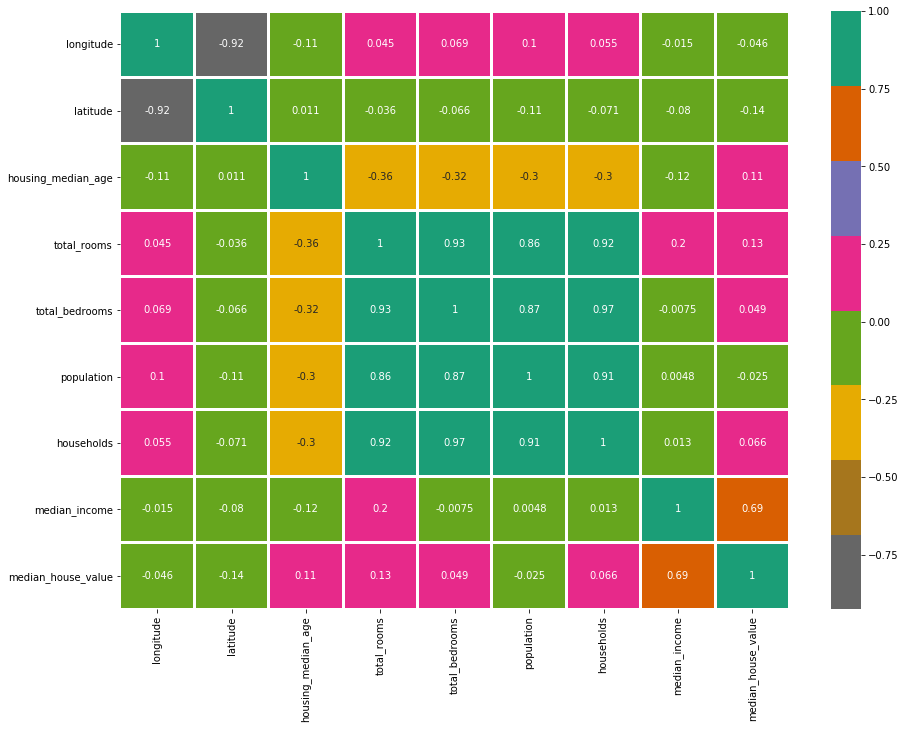

In [37]:
plt.figure(figsize=(15,11))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

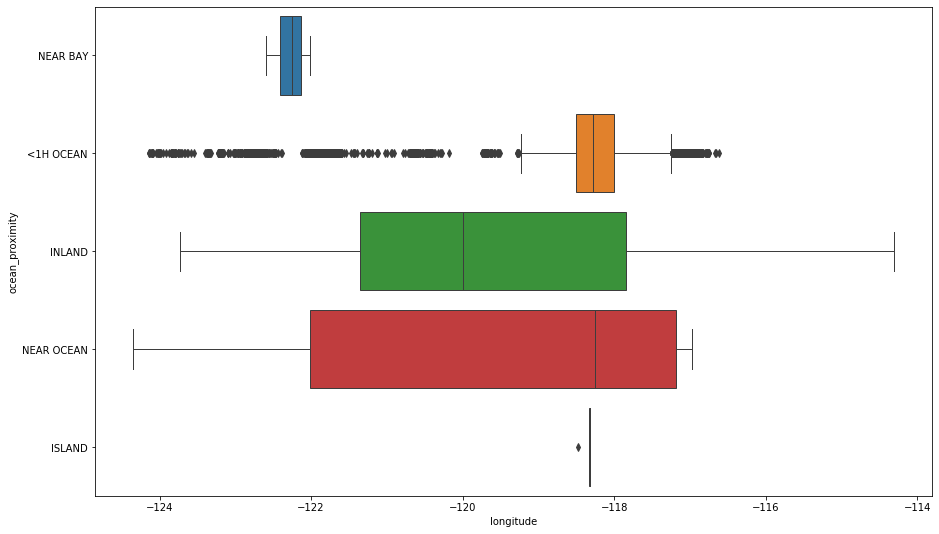

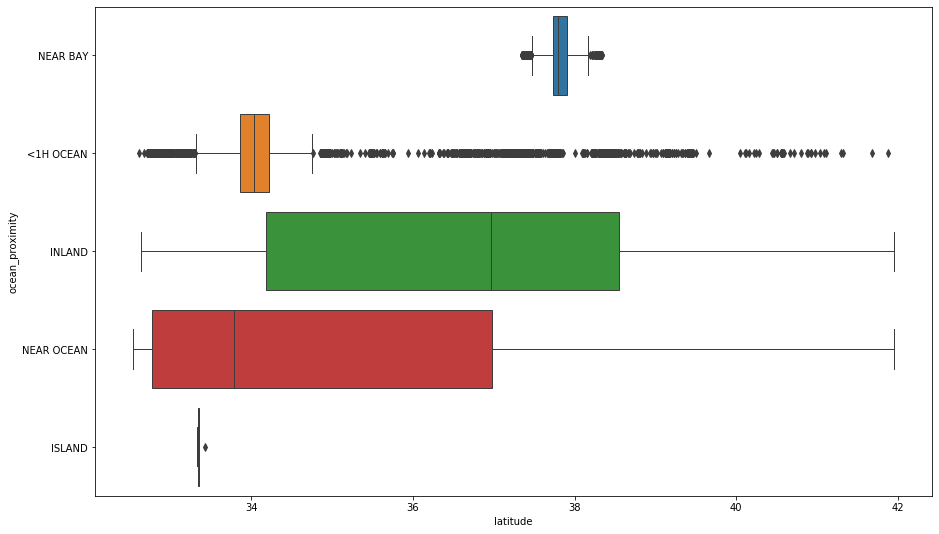

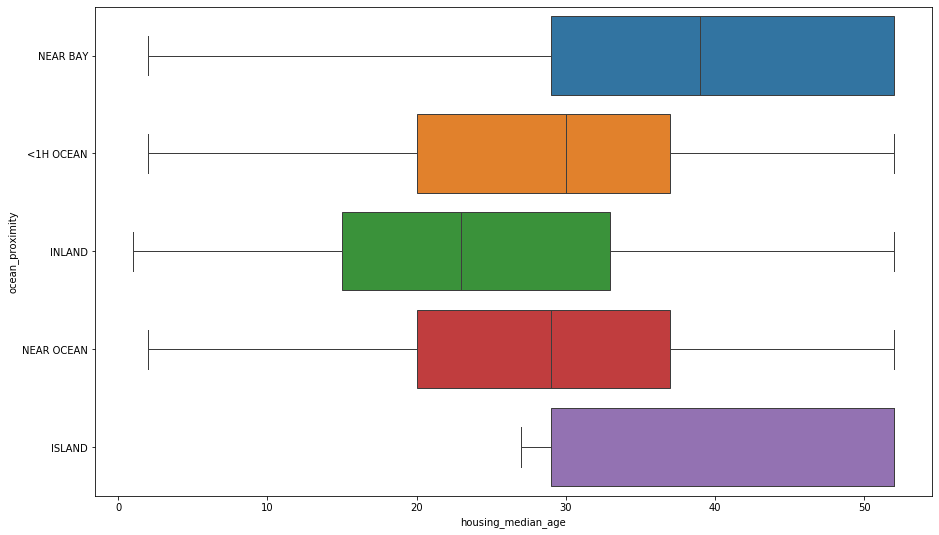

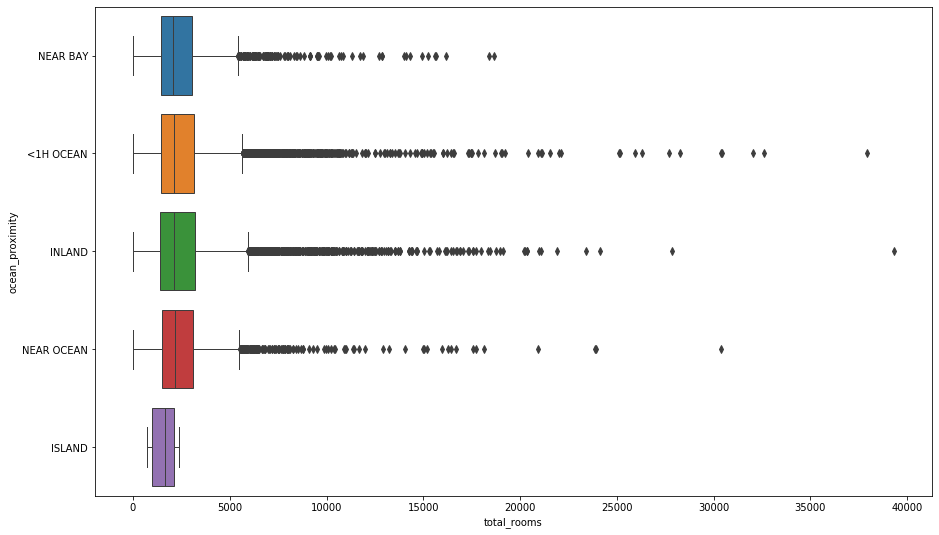

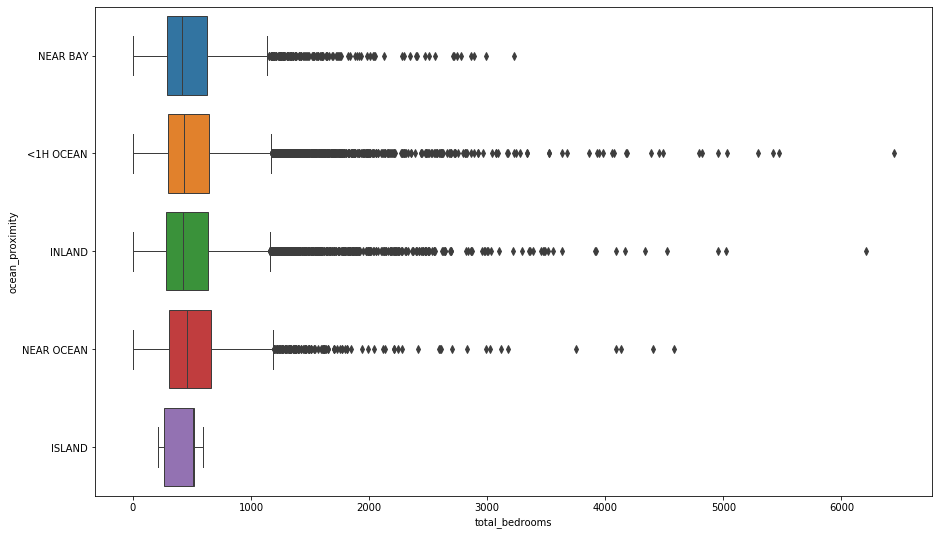

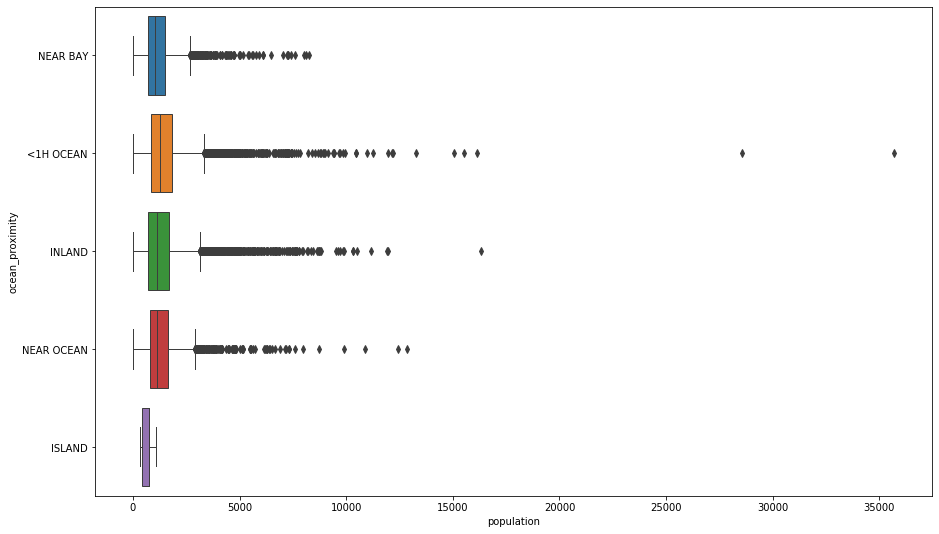

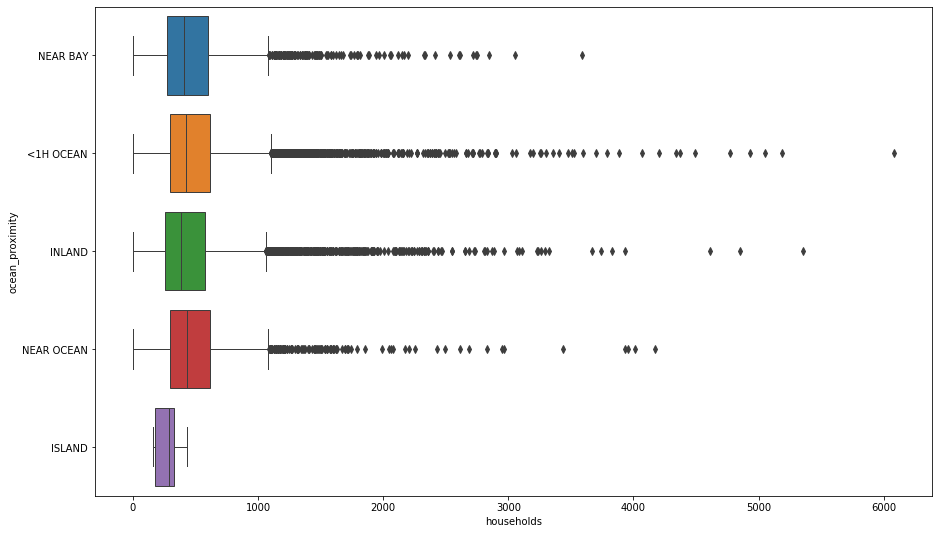

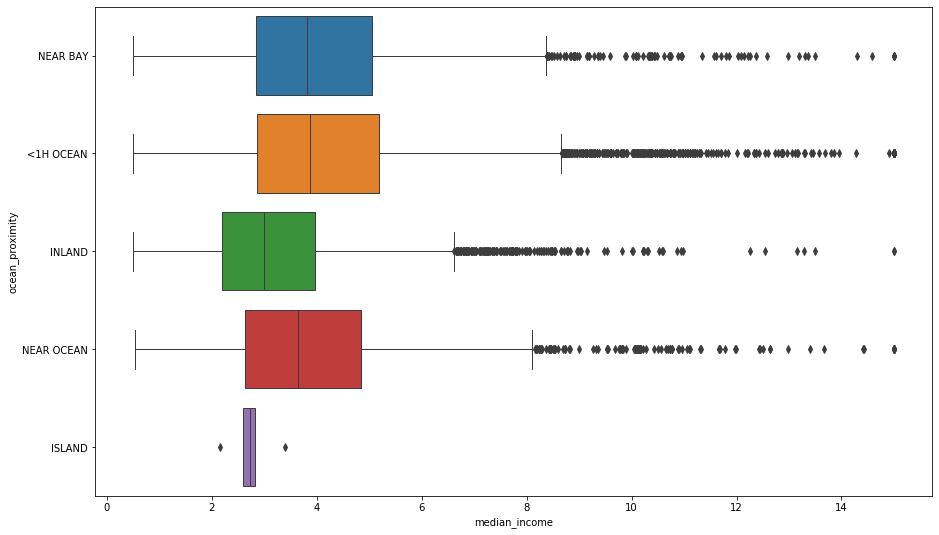

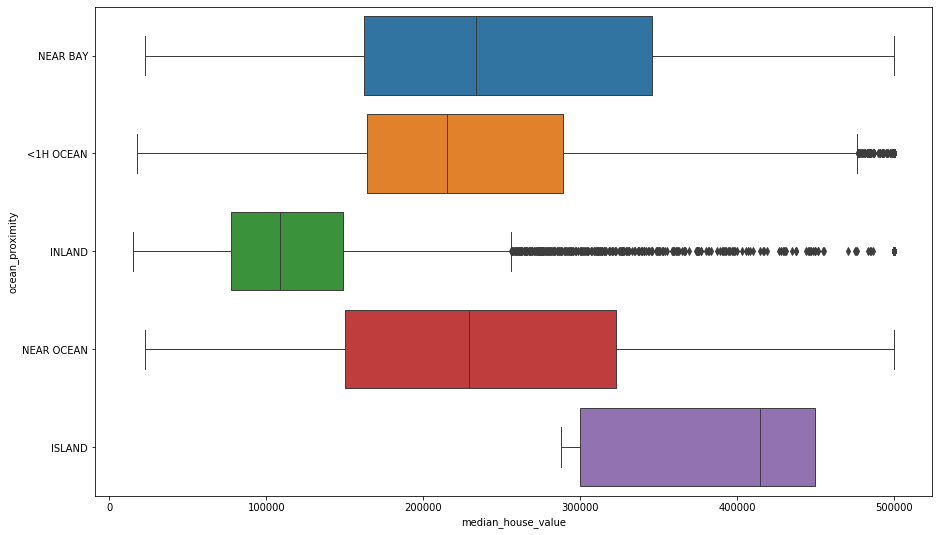

In [39]:
for i in ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']:
    plt.figure(figsize=(15,9))
    sns.boxplot(y=df.ocean_proximity,x=df[i],data=df,linewidth=1,)
    plt.show()

In [43]:
#Check for empty elements

nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)

                    Total Null Values  Percentage
longitude                           0         0.0
latitude                            0         0.0
housing_median_age                  0         0.0
total_rooms                         0         0.0
total_bedrooms                      0         0.0
population                          0         0.0
households                          0         0.0
median_income                       0         0.0
median_house_value                  0         0.0
ocean_proximity                     0         0.0


In [46]:
from sklearn.preprocessing import PolynomialFeatures

In [50]:
le=LabelEncoder()

In [51]:
df['ocean_proximity']=le.fit_transform(df['ocean_proximity'])

In [52]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [53]:
#Removal of outlier:

df1 = df.copy()

#features1 = [i for i in features if i not in ['CHAS','RAD']]
features1 = df

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
display(df1.head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(df.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,0
1,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,0
2,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,0
3,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,0
4,-121.99,37.58,31.0,2878.0,478.0,1276.0,485.0,6.2073,282500.0,0



Inference:
Before removal of outliers, The dataset had 20640 samples.
After removal of outliers, The dataset now has 12969 samples.


In [54]:
df.shape

(20640, 10)

In [55]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

KeyboardInterrupt: 

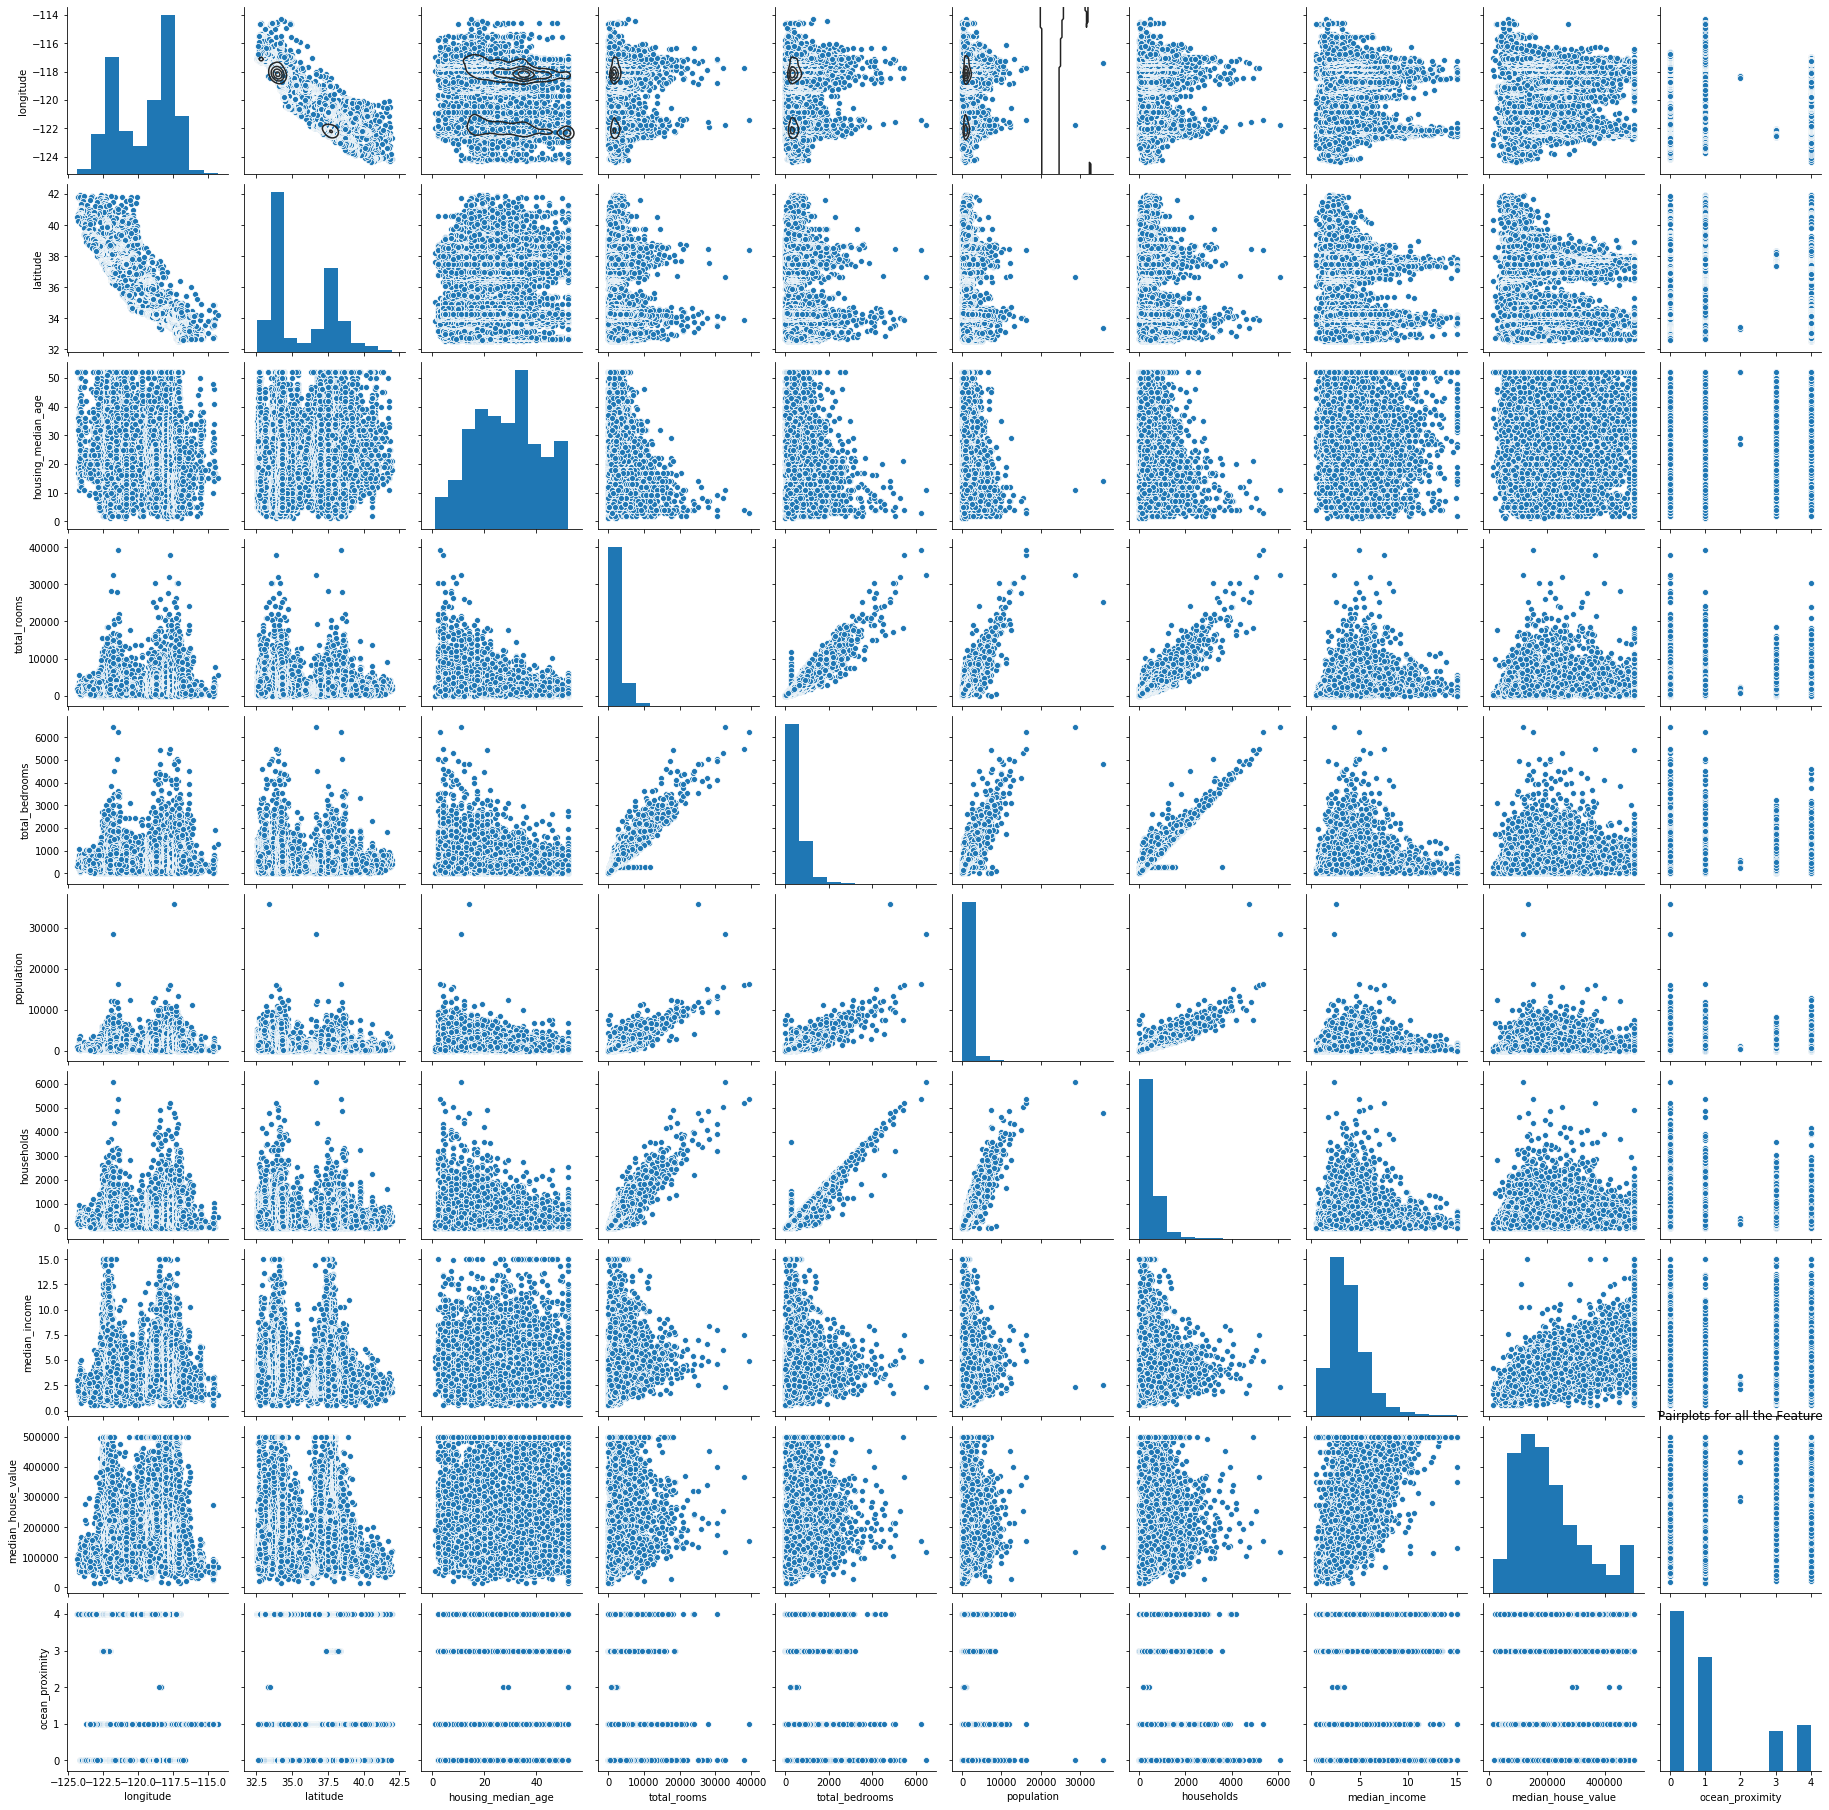

In [59]:
x=df.drop(['ocean_proximity'],axis='columns')
y=df.ocean_proximity.values

In [60]:
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [64]:
xtrain,xtest,ytrain,ytst=train_test_split(x,y,test_size=.3)

In [65]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [66]:
from sklearn.linear_model import LogisticRegression
lo = LogisticRegression()
lo.fit(xtrain,ytrain)
pred_lo=lo.predict(xtest)
accu_lo=accuracy_score(ytst,pred_lo)*100
accu_lo

C:\Users\mdasi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


80.39405684754522

In [67]:
print(classification_report(ytst,pred_lo))

              precision    recall  f1-score   support

           0       0.76      0.90      0.83      2775
           1       0.97      0.93      0.95      1905
           2       0.00      0.00      0.00         3
           3       0.66      0.78      0.71       695
           4       0.61      0.19      0.28       814

    accuracy                           0.80      6192
   macro avg       0.60      0.56      0.56      6192
weighted avg       0.79      0.80      0.78      6192



C:\Users\mdasi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
tre=DecisionTreeClassifier()
tre.fit(xtrain,ytrain)
pred_tre=tre.predict(xtest)
accu_tre=accuracy_score(ytst,pred_tre)*100
accu_tre

97.5452196382429

In [69]:
print(classification_report(ytst,pred_tre))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2775
           1       0.99      0.99      0.99      1905
           2       1.00      1.00      1.00         3
           3       0.99      0.97      0.98       695
           4       0.94      0.95      0.94       814

    accuracy                           0.98      6192
   macro avg       0.98      0.98      0.98      6192
weighted avg       0.98      0.98      0.98      6192



In [70]:
kne=KNeighborsClassifier()
kne.fit(xtrain,ytrain)
pred_kne=kne.predict(xtest)
accu_kne=accuracy_score(ytst,pred_kne)*100
accu_kne

81.23385012919897

In [71]:
print(classification_report(ytst,pred_kne))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84      2775
           1       0.93      0.87      0.90      1905
           2       0.00      0.00      0.00         3
           3       0.74      0.75      0.74       695
           4       0.68      0.44      0.53       814

    accuracy                           0.81      6192
   macro avg       0.63      0.59      0.60      6192
weighted avg       0.81      0.81      0.81      6192



C:\Users\mdasi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
from sklearn.ensemble import AdaBoostClassifier

In [73]:
ada=AdaBoostClassifier()
ada.fit(xtrain,ytrain)
pred_ada=ada.predict(xtest)
accu_ada=accuracy_score(ytst,pred_ada)*100
accu_ada

73.96640826873386

In [74]:
print(classification_report(ytst,pred_ada))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80      2775
           1       0.89      0.65      0.75      1905
           2       0.00      0.00      0.00         3
           3       0.60      0.84      0.70       695
           4       0.58      0.46      0.51       814

    accuracy                           0.74      6192
   macro avg       0.56      0.56      0.55      6192
weighted avg       0.75      0.74      0.74      6192



C:\Users\mdasi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
from sklearn.ensemble import BaggingClassifier

In [76]:
bag=BaggingClassifier()
bag.fit(xtrain,ytrain)
pred_bag=bag.predict(xtest)
accu_bag=accuracy_score(ytst , pred_bag)*100
accu_bag

98.09431524547804

In [77]:
print(classification_report(ytst,pred_bag))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2775
           1       0.99      0.99      0.99      1905
           2       0.00      0.00      0.00         3
           3       0.98      0.99      0.99       695
           4       0.97      0.93      0.95       814

    accuracy                           0.98      6192
   macro avg       0.78      0.78      0.78      6192
weighted avg       0.98      0.98      0.98      6192



C:\Users\mdasi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
from sklearn.naive_bayes import GaussianNB

In [79]:
gau=GaussianNB()
gau.fit(xtrain,ytrain)
pre_gau=gau.predict(xtest)
accu_l=accuracy_score(ytst,pre_gau)*100
accu_l

69.97739018087856

In [80]:
print(classification_report(ytst,pre_gau))

              precision    recall  f1-score   support

           0       0.69      0.81      0.74      2775
           1       0.76      0.73      0.75      1905
           2       0.00      0.00      0.00         3
           3       0.67      0.96      0.79       695
           4       0.27      0.04      0.07       814

    accuracy                           0.70      6192
   macro avg       0.48      0.51      0.47      6192
weighted avg       0.65      0.70      0.66      6192



C:\Users\mdasi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [81]:
from sklearn.ensemble import ExtraTreesClassifier

In [82]:
etc=ExtraTreesClassifier()
etc.fit(xtrain,ytrain)
pre_etc=etc.predict(xtest)
accu_etc=accuracy_score(ytst,pre_etc)*100
accu_etc

95.7687338501292

In [83]:
print(classification_report(ytst,pre_etc))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2775
           1       0.99      0.97      0.98      1905
           2       0.00      0.00      0.00         3
           3       0.94      0.97      0.95       695
           4       0.95      0.86      0.90       814

    accuracy                           0.96      6192
   macro avg       0.76      0.75      0.76      6192
weighted avg       0.96      0.96      0.96      6192



C:\Users\mdasi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [84]:
from sklearn.svm import SVC

In [85]:
svc=SVC()
svc.fit(xtrain,ytrain)
pre_svc=svc.predict(xtest)
accu_svc=accuracy_score(ytst,pre_svc)*100
accu_svc

85.73966408268734

In [86]:
print(classification_report(ytst,pre_svc))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      2775
           1       0.99      0.92      0.95      1905
           2       0.00      0.00      0.00         3
           3       0.69      0.85      0.76       695
           4       0.84      0.49      0.61       814

    accuracy                           0.86      6192
   macro avg       0.67      0.64      0.64      6192
weighted avg       0.86      0.86      0.85      6192



C:\Users\mdasi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
rfc=RandomForestClassifier()
rfc.fit(xtrain,ytrain)
pre_rfc=rfc.predict(xtest)
accu_rfc=accuracy_score(ytst,pre_rfc)*100
accu_rfc

97.10917312661499

In [89]:
print(classification_report(ytst,pre_rfc))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2775
           1       0.99      0.98      0.98      1905
           2       0.00      0.00      0.00         3
           3       0.96      0.99      0.98       695
           4       0.96      0.91      0.93       814

    accuracy                           0.97      6192
   macro avg       0.78      0.77      0.77      6192
weighted avg       0.97      0.97      0.97      6192



C:\Users\mdasi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
models = pd.DataFrame({
    'Model': ['LogisticRegression','DecisionTreeClassifier','KNeighborsClassifier' , 
             'AdaBoostClassifier','BaggingClassifier','GaussianNB','ExtraTreesClassifier','SVM','RandomForestClassifier'],
    'Score': [accu_lo,accu_tre, accu_kne, accu_ada,accu_bag,accu_l,accu_etc,accu_svc,accu_rfc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,BaggingClassifier,98.094315
1,DecisionTreeClassifier,97.545220
8,RandomForestClassifier,97.109173
6,ExtraTreesClassifier,95.768734
7,SVM,85.739664
2,KNeighborsClassifier,81.233850
0,LogisticRegression,80.394057
3,AdaBoostClassifier,73.966408
5,GaussianNB,69.977390


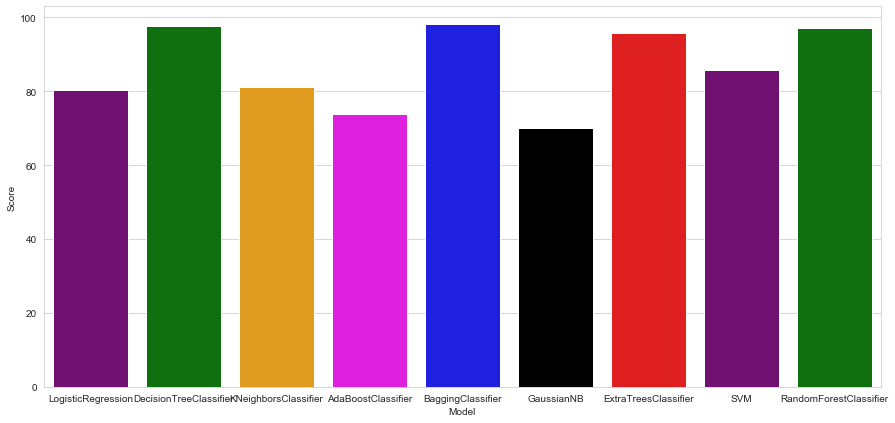

In [91]:
colors = ["purple", "green", "orange", "magenta","blue","black","red"]

sns.set_style("whitegrid")
plt.figure(figsize=(15,7))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()

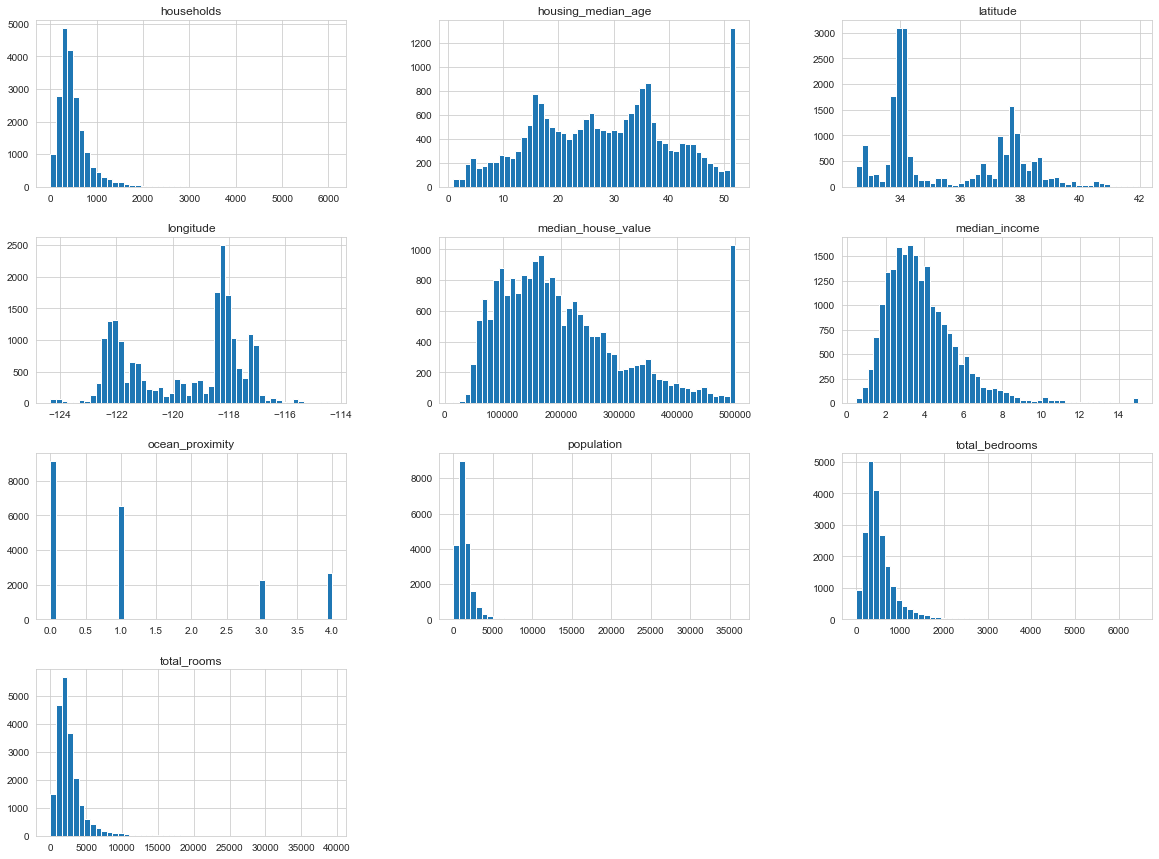

In [92]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20, 15))
plt.show()

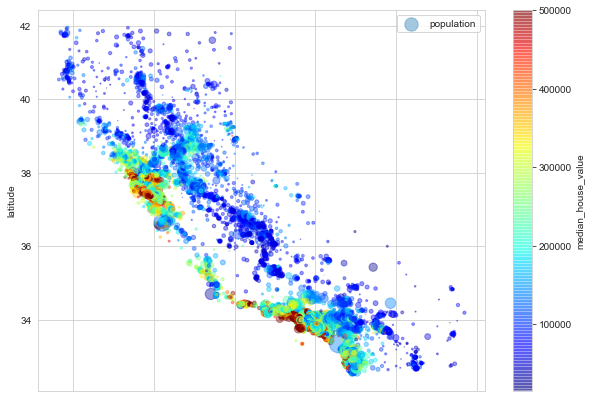

In [94]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, figsize=(10, 7), c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True, s=df.population/100, label='population')
plt.legend()